/Users/wangleo/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((100, 100), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


[[ -1.00000000e-05  -1.00000000e-05  -1.00000000e-05 ...,  -1.00000000e-05
   -1.00000000e-05  -1.00000000e-05]
 [ -1.00000000e-05  -1.00000000e-05  -1.00000000e-05 ...,  -1.00000000e-05
   -1.00000000e-05  -1.00000000e-05]
 [ -1.00000000e-05  -1.00000000e-05  -1.00000000e-05 ...,  -1.00000000e-05
   -1.00000000e-05  -1.00000000e-05]
 ..., 
 [ -1.00000000e-05  -1.00000000e-05  -1.00000000e-05 ...,  -1.00000000e-05
   -1.00000000e-05  -1.00000000e-05]
 [ -1.00000000e-05  -1.00000000e-05  -1.00000000e-05 ...,  -1.00000000e-05
   -1.00000000e-05  -1.00000000e-05]
 [ -1.00000000e-05  -1.00000000e-05  -1.00000000e-05 ...,  -1.00000000e-05
   -1.00000000e-05  -1.00000000e-05]]
[[  1.00000000e-05   1.00000000e-05   1.00000000e-05 ...,   1.00000000e-05
    1.00000000e-05   1.00000000e-05]
 [  1.00000000e-05   1.00000000e-05   1.00000000e-05 ...,   1.00000000e-05
    1.00000000e-05   1.00000000e-05]
 [  1.00000000e-05   1.00000000e-05   1.00000000e-05 ...,   1.00000000e-05
    1.00000000e-05   

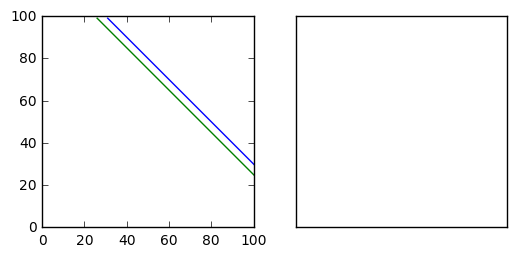

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 23 19:32:16 2017

@author: wangleo
"""

#The code should be developed from big picture to specific
#steps, therefore we put files in folders, this main 
#should not be edited, main is based on YOUTUBE:
#https://www.youtube.com/watch?v=vVeyP85xKD4&t=8s

#recommand using Sublime, Don't use Spyder, the tabs are 
#different, it can cause problems

#When import library or module ALWAYS import as
#When code is in a folder use foldername.filename
#e.g. import numpy as np
#e.g. import plot as plt
import math as ma
import numpy as np
import EH.Linear_Ops as lin_func#example of in_folder func
import EH.Curl as cr
import Initial_Material.Mat_Class as mat
import copy as cp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time as tm
import matplotlib.colors as clr
from mpl_toolkits.mplot3d import Axes3D


#set up the size of the map
L=100
W=100
#set the size of a single grid
# l=1
#======parameters=======
e0=10
e1=1#different material
mu0=1
c0=2900000#wrong number for not explode
fmax=5e3
nmax=e1*mu0
dx=dy=c0/fmax/nmax
tau = 0.5/fmax
#dt = 0.3e-8
dt=tau/10#originally 2 in the denominator changed to 5
Mat_map=mat.Mat(L,W,dt)
print(Mat_map.M_Ez_Coef_Ex)
print(Mat_map.M_Ez_Coef_Ey)
print(Mat_map.M_Ez_Coef_Hz)
print(Mat_map.M_Ez_Coef_Dz)
    


#======other material=======
Mat_map.add_mat_bond(0,int(L),0,int(W),e0,mu0)#(i_i,i_f,j_i,j_f,e,mu)
#Mat_map.add_mat_bond(0,int(L/2),0,int(W),e1,mu0)#(i_i,i_f,j_i,j_f,e,mu)
#Mat_map.add_mat_bond(0,int(L/2)-15,0,int(W),e0,mu0)
# dx=1e-6
# dy=1e-6

# nmax=1
# fmax=5e9
# tau=0.5/fmax

def function1(x):
	return -x+130
def function2(x):
	return -x+125

matbond_low=0
matbond_high=100
Mat_map.add_mat_bond_advanced(function1,matbond_low,matbond_high,e1,mu0)
#Mat_map.add_mat_bond_advanced(function2,matbond_low,matbond_high,e0,mu0)



#======sources=======
#step = 300;
t0=5*tau
tprop=1*(L*W)**(1/2)*(dx*dy)**(1/2)/c0
t=2*t0+3*tprop
step=int(np.ceil(t/dt))
print('step',step)
tm.sleep(3)
print(step)
t=np.array(range(step-1))*dt
# print(t)


s=dx/2+dt/2
#+dt/2
# print(t)
nx_src=int(np.floor(11))
ny_src=int(np.floor(11))
A=-(Mat_map.e[nx_src-1,ny_src-1]/Mat_map.mu[nx_src-1,ny_src-1])**(1/2)

Esrc=[]
Hsrc=[]
for i in range(len(t)):  
    Esrc.append(ma.exp(-((t[i]-t0)/tau)**2))
    Hsrc.append(A*ma.exp(-((t[i]-t0)/tau+s)**2))


#setup, the following code should run once
#Set Initial Conditions
#Set Material Property
#set the PML parameters
PML=[10,10,10,10]

W2=2*W
L2=2*L

sigx=np.zeros([L2,W2])
print(sigx)
for nx in range(2*PML[0]):
    nx1=2*PML[0]-nx;
    for i in range(W2):
        sigx[nx1-1,i]=(0.5*e0/dt)*(nx/2/PML[0])**3
for nx in range(2*PML[1]):
    nx1=L2-2*PML[1]+nx+1;
    for i in range(W2):
        sigx[nx1-1,i]=(0.5*e0/dt)*(nx/2/PML[1])**3

sigy=np.zeros([L2,W2])
for ny in range(2*PML[2]):
    ny1=2*PML[2]-ny;
    for i in range(L2):
        sigy[i,ny1-1]=(0.5*e0/dt)*(ny/2/PML[2])**3
for ny in range(2*PML[3]):
    ny1=W2-2*PML[3]+ny+1;
    for i in range(L2):
        sigy[i,ny1-1]=(0.5*e0/dt)*(ny/2/PML[3])**3


sigHx=np.zeros([L,W])
sigHy=np.zeros([L,W])
sigHx1=np.zeros([L,W])
sigHy1=np.zeros([L,W])
sigDx=np.zeros([L,W])
sigDy=np.zeros([L,W])


for i in range(L):
    for j in range(W):
        sigHx[i,j]=sigx[i*2,j*2+1]
        sigHy[i,j]=sigy[i*2,j*2+1]
        sigHx1[i,j]=sigx[i*2+1,j*2]
        sigHy1[i,j]=sigx[i*2+1,j*2]
        sigDx[i,j]=sigx[i*2,j*2]
        sigDy[i,j]=sigy[i*2,j*2]
        
mHx0 = (1/dt) + sigHy/(2*e0)
mHx1 = ((1/dt) - sigHy/(2*e0))/mHx0
mHx2 = -c0/mu0/mHx0
mHx3 = -(c0*dt/e0)*sigHx/mu0/mHx0
mHy0 = (1/dt) + sigHx1/(2*e0)
mHy1 = ((1/dt) - sigHx1/(2*e0))/mHy0
mHy2 = -c0/mu0/mHy0
mHy3 = -(c0*dt/e0)*sigHy1/mu0/mHy0
mDz0 = (1/dt)+(sigDx + sigDy)/(2*e0)+sigDx*sigDy*(dt/4/e0**2)
mDz1 = (1/dt)-(sigDx + sigDy)/(2*e0)-sigDx*sigDy*(dt/4/e0**2)
mDz1 = mDz1/ mDz0
mDz2 = c0/mDz0
mDz4 = -(dt/e0**2)*sigDx*sigDy/mDz0

#
#==================TEST for material class, you can add a block of material in 2d


print("mat=",Mat_map.e)
#==================

Ex=np.zeros((L,W),float)

r,c=np.shape(Ex)
Ex[0:r,0:c]=0


Ez=cp.deepcopy(Ex)
Hx=cp.deepcopy(Ex)
Hy=cp.deepcopy(Ex)
Dz=cp.deepcopy(Ex)
ICEx=cp.deepcopy(Ex)
ICEy=cp.deepcopy(Ex)
IDz=cp.deepcopy(Ex)
#inital condition

fig =plt.figure()      # Create a figure
ax1=plt.subplot(1,2,1)
ax1.set_aspect('equal')
ax1.set_xlim([0, W])
ax1.set_ylim([0, L])
x=range(matbond_low,matbond_high)
y1=[]
y2=[]
for x_now in x:
    y1.append(function1(x_now))
    y2.append(function2(x_now))
im_mat=ax1.plot(y1,x,y2,x)

ani=plt.subplot(1,2,2)
      # Create a figure
plt.gca().axes.get_xaxis().set_ticks([])  # Turn off x axis ticks
plt.gca().axes.get_yaxis().set_ticks([])  # Turn off y axis ticks

     # Typical scale of wave (higher values are clipped)




#
  
#======DO NOT USE FOR FINAL

# <<<<<<< Updated upstream
ims=[]
# <<<<<<< HEAD
# =======
# >>>>>>> Stashed changes
# while(n<100):
# =======
for t in range(step) :

 	CEx=cr.M_Ez_Curl_Ex(Ez,dy)
	#print("CEx=\n",CEx)
 	CEy=cr.M_Ez_Curl_Ey(Ez,dx)
 	
     
##====TFSF=====================================================================     
 	for i in range(L):
         CEx[i,ny_src-1]=(Ez[i,ny_src-1]-Ez[i,ny_src-2]-Esrc[t-1])/dy
     
	#print("CEy=\n",CEy)
 	ICEx=ICEx+CEx
 	ICEy=ICEy+CEy 
    
 	Hx=mHx1*Hx+(mHx2*CEx+mHx3*ICEx)
# 	#print(Hx)
 	Hy=mHy1*Hy+(mHy2*CEy+mHy3*ICEy)
# 	#print(Hy)
 	CHz=cr.M_Ez_Curl_Hz(Hx, Hy, dx, dy)
 	for i in range(L):
         CHz[i,ny_src-1]=(Hy[i,ny_src-1]-Hy[i-1,ny_src-1])/dx-(Hy[i,ny_src-1]-Hy[i,ny_src-2])/dy+Hsrc[t-1]/dy
 
 	IDz=Dz+IDz
 	Dz=mDz1*Dz+mDz2*CHz+mDz4*IDz
#==============================================================================
 	



##====single source============================================================
# 	ICEx=ICEx+CEx
# 	ICEy=ICEy+CEy
# 	Hx=mHx1*Hx+(mHx2*CEx+mHx3*ICEx)
## 	#print(Hx)
# 	Hy=mHy1*Hy+(mHy2*CEy+mHy3*ICEy)
## 	#print(Hy)
# 	CHz=cr.M_Ez_Curl_Hz(Hx, Hy, dx, dy)
# 	IDz=Dz+IDz
# 	Dz=mDz1*Dz+mDz2*CHz+mDz4*IDz
# 	Dz[nx_src-1,ny_src-1]=Esrc[t-1]+Dz[nx_src-1,ny_src-1]
##====single source============================================================







##====visualization============================================================
 	Ez=Dz/Mat_map.e

 	im=plt.imshow(Ez, origin='lower',animated=True,interpolation="bicubic")
 	plt.hsv
 	ims.append([im])
	
 	#print(t)
##====visualization============================================================

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=0)

plt.show()







